In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_data = pd.read_csv('내국인출국교통수단별_2015-2022.csv', encoding='cp949', header=1)
# pd_data = pd.read_csv('내국인출국교통수단별_20230302170210.csv', encoding='cp949', header=1)
pd_data.columns = ['시점','공항', '항구']
pd_data.head()


# 공항, 항구 년중 월별 출국 인원 plot
# normalization / standardization 적용, plot

# 2015부터 2022년까지 추이 보기.
# - 2022년 연말 공항 이용객 증가하였음.
# - 2022년 연말에 공항 출국 인원이 늘어난 것이 항구 출국인원에도 반영이되었는가.
# - 연말에 출국인원이 증가하는 것이 일반적인 추이인가. --> 코로나 이전/이후 연도별 추이

# .sort_values()
# .sort_index()

,시점,공항,항구
0,2015.01,226687,50545
1,2015.02,173950,44152
2,2015.03,175351,36822
3,2015.04,195851,46589
4,2015.05,199356,54680


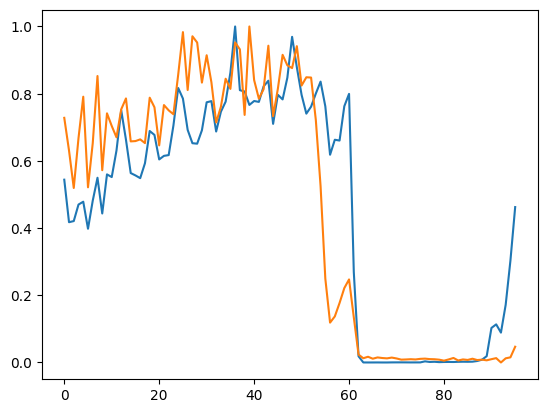

In [40]:
# normalization
pd_data['공항'].describe()
air_min = pd_data['공항'].min()
air_max = pd_data['공항'].max()
pd_data['공항_norm'] = pd_data['공항'].apply(lambda x : (x - air_min)/(air_max - air_min))

pd_data['항구'].describe()
port_min = pd_data['항구'].min()
port_max = pd_data['항구'].max()
pd_data['항구_norm'] = pd_data['항구'].apply(lambda x : (x - port_min)/(port_max - port_min))

_,axe = plt.subplots()
axe.plot(pd_data['공항_norm'])
axe.plot(pd_data['항구_norm'])

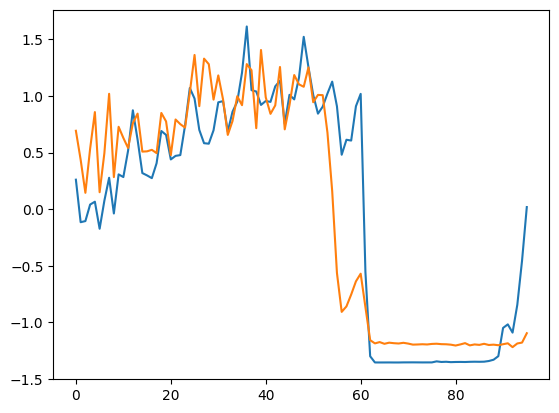

In [41]:
# standardization
pd_data['공항'].describe()
air_mean = pd_data['공항'].mean()
air_std = pd_data['공항'].std()
pd_data['공항_std'] = pd_data['공항'].apply(lambda x : (x - air_mean)/(air_std))

pd_data['항구'].describe()
port_mean = pd_data['항구'].mean()
port_std = pd_data['항구'].std()
pd_data['항구_std'] = pd_data['항구'].apply(lambda x : (x - port_mean)/(port_std))

_,axe = plt.subplots()
axe.plot(pd_data['공항_std'])
axe.plot(pd_data['항구_std'])

In [48]:
pd_data.dtypes

yr = pd_data['시점']//1
mo = pd_data['시점']%1*100
print(mo)

str_time = pd_data['시점'].astype('str')
yr = str_time.apply(lambda x : x.split('.')[0])
mo = str_time.apply(lambda x : x.split('.')[1])

# print(pd_data['시점'])
dt_time = pd.to_datetime(pd_data['시점'], format="%Y/%m")
print(dt_time)

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
91     8.0
92     9.0
93    10.0
94    11.0
95    12.0
Name: 시점, Length: 96, dtype: float64
0    1970-01-01 00:00:00.000002015
1    1970-01-01 00:00:00.000002015
2    1970-01-01 00:00:00.000002015
3    1970-01-01 00:00:00.000002015
4    1970-01-01 00:00:00.000002015
                  ...             
91   1970-01-01 00:00:00.000002022
92   1970-01-01 00:00:00.000002022
93   1970-01-01 00:00:00.000002022
94   1970-01-01 00:00:00.000002022
95   1970-01-01 00:00:00.000002022
Name: 시점, Length: 96, dtype: datetime64[ns]


In [37]:
np_data = np.array(pd_data['시점'])
lista = []
for e in np_data:
    e = str(e)
    lista.append(e[:e.index('.')])
# print(lista)

np_data = np.array(lista).astype(np.int64)
# print(np_data)
pd_data['시점'] = np_data
print(pd_data['시점'])

0     2015
1     2015
2     2015
3     2015
4     2015
      ... 
91    2022
92    2022
93    2022
94    2022
95    2022
Name: 시점, Length: 96, dtype: int64
